# 0. Imports

## 0.1. Importing Libraries

In [1]:
import math
import pandas as pd
import numpy as np
import inflection 

import seaborn as sns

from matplotlib import pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image

## 0.1. Helper Functions

In [2]:
# Função auxiliar:

def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams[ 'figure.figsize' ] = [20, 10]
    plt.rcParams[ 'font.size' ] = 20
    
    display( HTML( '<style>.container { width:95% !important; }</style>' ) )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Suppressing the scientific notation of the metrics

pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 0.2. Loading the Data

In [5]:
df_sales_raw = pd.read_csv( 'datasets/train.csv', low_memory = False )
df_store_raw = pd.read_csv( 'datasets/store.csv', low_memory = False )

#Merge of both dataframes:
df_raw = pd.merge( df_sales_raw, df_store_raw, on = 'Store', how = 'left' )

In [6]:
#Verifying the merging:

df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
341543,529,3,2014-09-10,5938,638,1,0,0,0,d,c,12920.00,9.00,2012.00,0,NaN,NaN,NaN


In [7]:
df1 = df_raw.copy()

# 1. (Passo 1) Descricao dos Dados

## 1.1. Renaming the columns 

In [8]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [9]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
            'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)

cols_new = list( map( snakecase, cols_old ) )  #funcao 'map' faz o mapeamento a partir da funcao 'snakecase' 
                                               #de todas as palavras da lista 'cols_old'.
    
#Reanming the columns:
df1.columns = cols_new

## 1.2. Data Dimensions 

In [10]:
print( 'Number of rows: {}'.format( df1.shape[0] ) )

print( 'Number of columns: {}'.format( df1.shape[1] ) )

Number of rows: 1017209
Number of columns: 18


## 1.3. Data Types 

In [11]:
df1['date'] = pd.to_datetime( df1['date'] )

df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Checking the 'NA's  

In [12]:
df1.isna().sum()

#É possível observar que da coluna 'store' até a coluna 'assortment', não existem dados faltantes, ou 'NA's. 
#Entretanto, para as outras colunas, sim! Isso pode variar desde erros manuais na insercao dos dados até 
#características do negócio que definiram a presenca desses dados faltantes. É interessante entender o motivo
#pelo qual esses dados estão como 'NA'.

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Filling in the 'NA' Data

In [13]:
df1['promo_interval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [14]:
# competition_distance              2642

    #distance in meters to the nearest competitor store.
    
    ##1st Hypothesis: 
    ##2nd Hypothesis: 
    
df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan(x) else x )
    

# competition_open_since_month    323348

    #gives the approximate month of the time the nearest competitor was opened.
    
    ##1st Hypothesis: Não existe competidor mais próximo, ou está longe demais, e por isso não existe 
                     #data de abertura para a competicao mais próxima.
    ##2nd Hypothesis: Realmente existe uma competicao próxima (Dentro do range do 'competition_distace'),
                     #porém não se sabe quando a loja abriu.
    
df1['competition_open_since_month'] = df1.apply( lambda x: 
                                                
                                        x['date'].month if math.isnan( x['competition_open_since_month'] ) 
                                                        else x['competition_open_since_month'], axis = 1 )
    

# competition_open_since_year     323348

    #gives the approximate year of the time the nearest competitor was opened
    

    
df1['competition_open_since_year'] = df1.apply( lambda x: 
                                                
                                        x['date'].year if math.isnan( x['competition_open_since_year'] ) 
                                                        else x['competition_open_since_year'], axis = 1 )


# promo2_since_week               508031

    #describes the calendar week when the store started participating in Promo2.
    ##If the data within 'promo2_since_week' = Na, it means that the store decided not to participate
    ##in the promotion ('promo2'). Hence, there's no info about this.
    

df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week 
                                               
                                               if math.isnan( x['promo2_since_week'] ) 
                                               else x['promo2_since_week'], axis = 1 )

    

#promo2_since_year               508031

    #describes the year when the store started participating in Promo2
    
    
df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year 
                                               
                                               if math.isnan( x['promo2_since_year'] ) 
                                               else x['promo2_since_year'], axis = 1 ) 


# promo_interval                  508031

    #describes the consecutive intervals Promo2 is started, naming the months the promotion is 
    #started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November 
    #of any given year for that store

    
month_map = { 1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8:'Aug', 9: 'Sept', 
              10: 'Oct', 11: 'Nov', 12: 'Dec' }

df1['promo_interval'].fillna( 0, inplace = True )

df1['month_map'] = df1['date'].dt.month.map( month_map )

df1['is_promo?'] = df1[['promo_interval', 'month_map']].apply( lambda x: 
                                                             
                                                 0 if x['promo_interval'] == 0 else 
                                                 1 if x['month_map'] in x['promo_interval'].split(',') else 
                                                 0, axis = 1 )





In [15]:
df1.sample(10).T

,594473,70173,66191,780313,509791,64005,481772,10655,979052,918567
store,964,1044,407,599,1022,451,878,621,868,593
day_of_week,3,6,2,4,2,4,6,3,1,6
date,2014-01-15 00:00:00,2015-05-30 00:00:00,2015-06-02 00:00:00,2013-08-01 00:00:00,2014-04-01 00:00:00,2015-06-04 00:00:00,2014-04-26 00:00:00,2015-07-22 00:00:00,2013-02-04 00:00:00,2013-03-30 00:00:00
sales,7806,6613,4469,10224,9635,0,5413,4801,12171,13897
customers,1183,901,335,920,996,0,536,634,812,1728
open,1,1,1,1,1,0,1,1,1,1
promo,0,0,1,1,1,1,0,0,1,0
state_holiday,0,0,0,0,0,a,0,0,0,0
school_holiday,0,0,1,1,0,0,0,1,0,0
store_type,a,c,a,d,a,a,d,a,d,a


In [16]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo?                       0
dtype: int64

In [17]:
df1.sample().T

,274261
store,576
day_of_week,5
date,2014-11-21 00:00:00
sales,5194
customers,748
open,1
promo,0
state_holiday,0
school_holiday,0
store_type,c


## 1.6. Changing the Data Types

In [18]:
#It's necessary to change the type of variable of 'competition_open_since_month' e 'competition_open_since_year'

df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)

df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

## 1.7. Statistical Description 

In [19]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo?                                int64
dtype: object

### 1.7.1. Numerical Attributes

In [20]:
num_attributes = df1.select_dtypes( include = ['float64','int64'] )  #Only numerical variables
cat_attributes = df1.select_dtypes( exclude = ['float64','int64', 'datetime64[ns]'] )  #Only string variables

In [21]:
# Central Tendency (mean, median)

## Mean:
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T

## Median:
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
    

# Dispersion (max, min, std, range, skew, kurtosis)

## Standard Deviation:
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T

## Minimum:
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T

## Maximum:
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T

## Range: 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T

## Skew:
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T

## Kurtosis:
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T


# Concatenating all operations:
metrics = pd.concat( [ d2, d3, d4, ct1, ct2, d1, d5, d6 ] ).T.reset_index()

metrics.columns = [ 'Attributes', 'Min', 'Max', 'Range', 'Mean', 'Median', 'StD', 'Skew', 'Kurtosis' ] 

In [22]:
metrics

,Attributes,Min,Max,Range,Mean,Median,StD,Skew,Kurtosis
0,store,1.00,1115.00,1114.00,558.43,558.00,321.91,-0.00,-1.20
1,day_of_week,1.00,7.00,6.00,4.00,4.00,2.00,0.00,-1.25
2,sales,0.00,41551.00,41551.00,5773.82,5744.00,3849.92,0.64,1.78
3,customers,0.00,7388.00,7388.00,633.15,609.00,464.41,1.60,7.09
4,open,0.00,1.00,1.00,0.83,1.00,0.38,-1.76,1.09
5,promo,0.00,1.00,1.00,0.38,0.00,0.49,0.49,-1.76
6,school_holiday,0.00,1.00,1.00,0.18,0.00,0.38,1.68,0.82
7,competition_distance,20.00,200000.00,199980.00,5935.44,2330.00,12547.65,10.24,147.79
8,competition_open_since_month,1.00,12.00,11.00,6.79,7.00,3.31,-0.04,-1.23
9,competition_open_since_year,1900.00,2015.00,115.00,2010.32,2012.00,5.52,-7.24,124.07


/home/renanpacheco/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

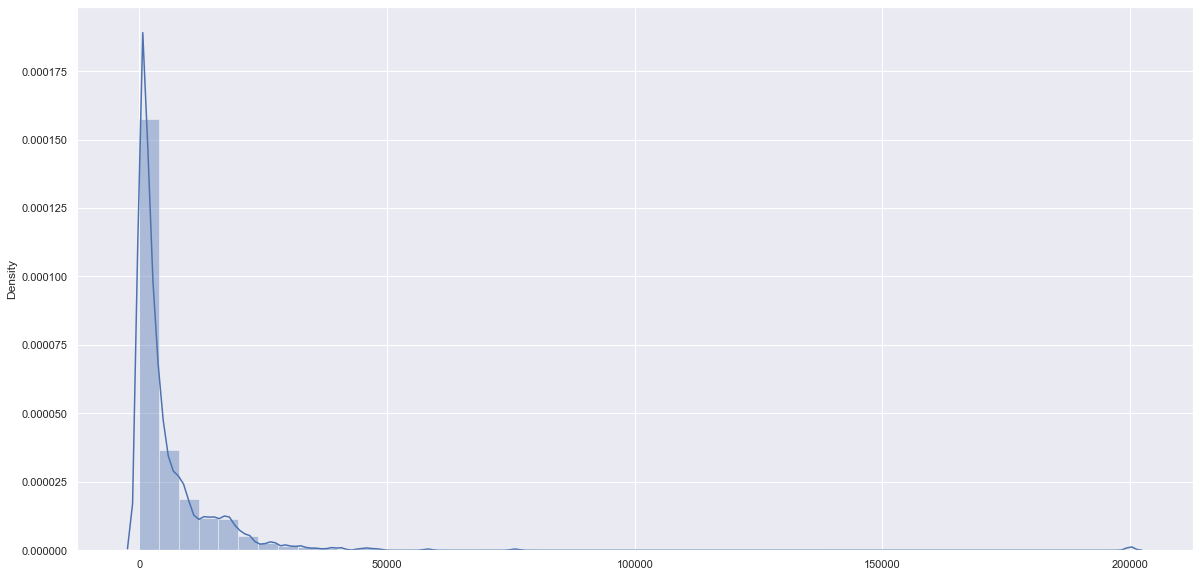

In [23]:
sns.distplot( df1[['competition_distance']] )

### 1.7.2. Categorical Attributes 

In [24]:
# Categorical Attributes, ou variáveis categóricas, são os atributos que são influenciados em funcão da categoria
# pelo qual pertencem. 

In [25]:
cat_attributes.dtypes

state_holiday     object
store_type        object
assortment        object
promo_interval    object
month_map         object
dtype: object

In [26]:
df1.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo?
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.00,9,2008,0,31,2015,0,Jul,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.00,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.00,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.00,9,2009,0,31,2015,0,Jul,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.00,4,2015,0,31,2015,0,Jul,0


In [27]:
# Checking the number of levels which categorical variable possesses:
cat_attributes.apply( lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

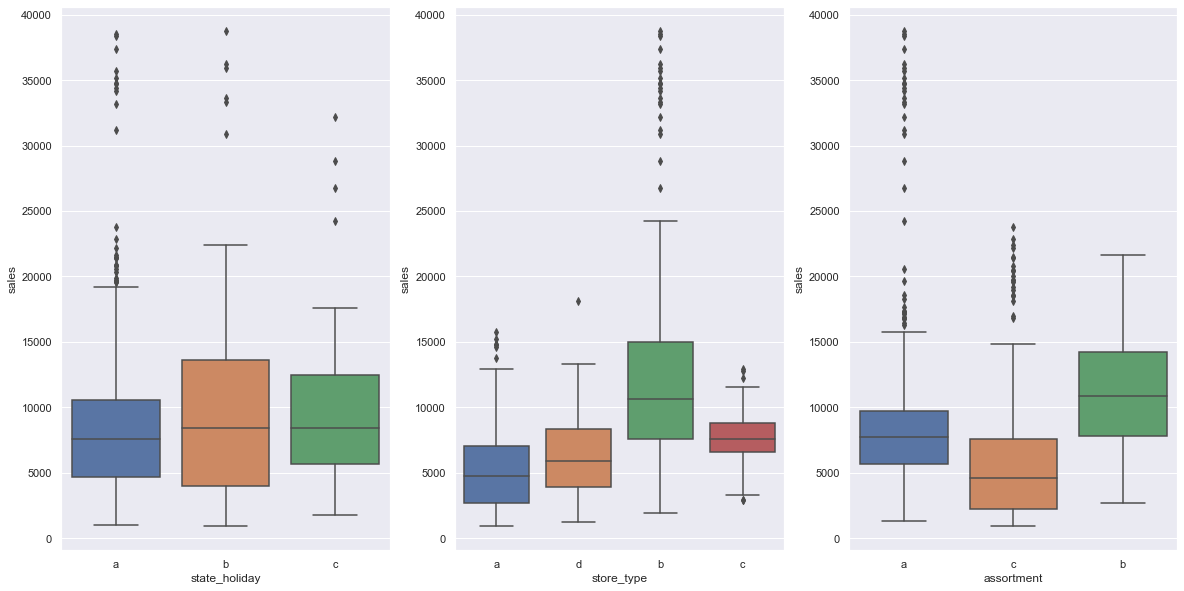

In [28]:
#It's necessary to disregard all sales that are null (= 0). Also, state holidays are not considered.

aux1 = df1[ ( df1['state_holiday'] != '0' ) & ( df1['sales'] > 0 ) ]

plt.subplot( 1, 3, 1 )
sns.boxplot( x = 'state_holiday', y = 'sales', data = aux1 )

plt.subplot( 1, 3, 2 )
sns.boxplot( x = 'store_type', y = 'sales', data = aux1 )

plt.subplot( 1, 3, 3 )
sns.boxplot( x = 'assortment', y = 'sales', data = aux1 )



In [29]:
# Linha fechada no meio dos quadrados: 50o quartil, ou mediana.
# 

# 2. (Passo 2) Feature Engineering

In [30]:
df2 = df1.copy()

## 2.0. Mind Map Hypothesis

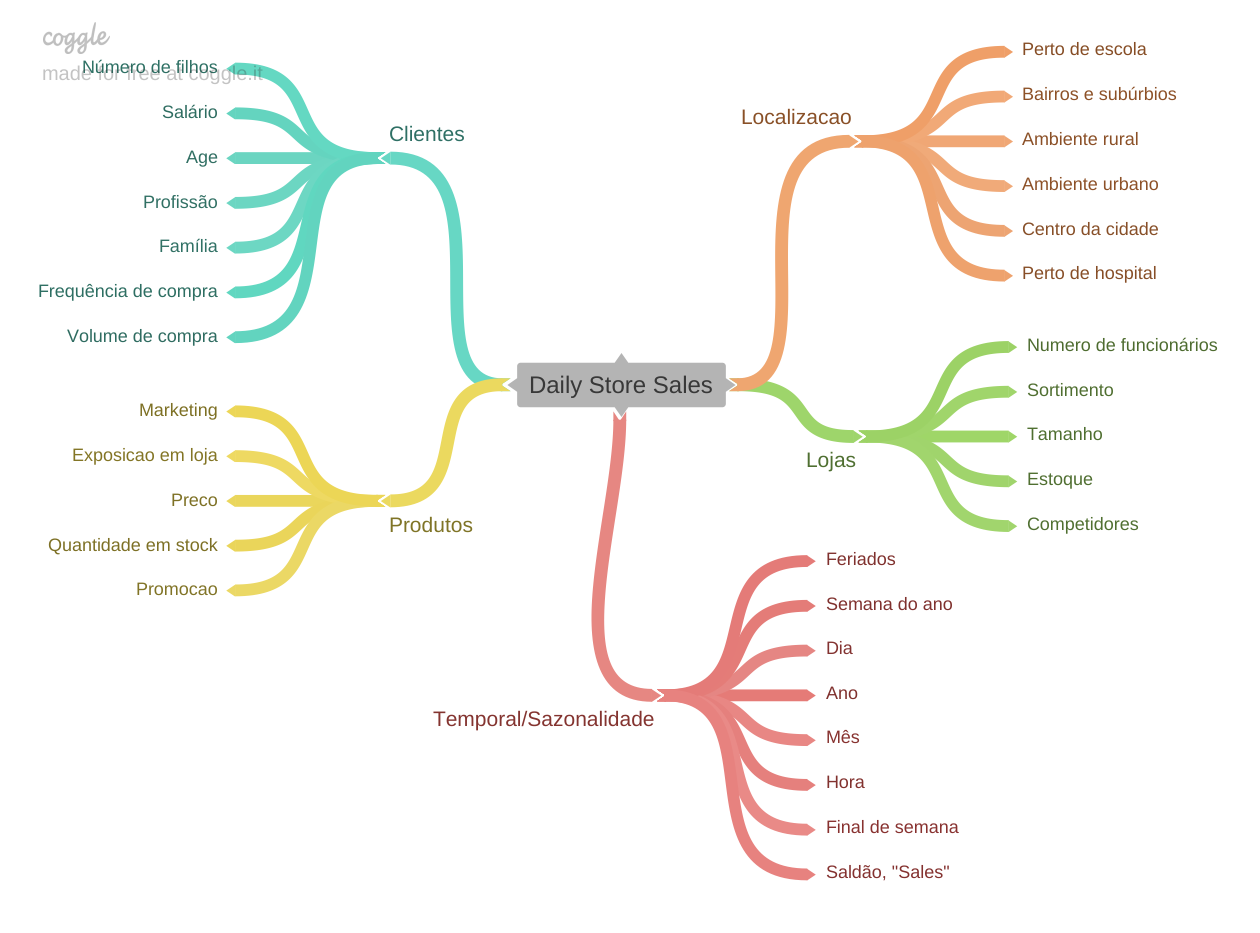

In [31]:
Image( 'Images/MindMapHypothesis.png' )

#  Verificar como diminuir o tamanho da imagem................

## 2.1. Creating the Hypothesis

### 2.1.1. Hypothesis for Stores

**1.** Lojas com maior quadro de funcionários vendem 
mais. 

**2.** Lojas com estoque maior deveriam vender mais. 

**3.** Lojas com maior porte deveriam vende mais.  

**4.** Lojas com menor porte deveriam vende menos.  

**5.** Lojas com maior sortimento deveriam vender mais.

**6.** Lojas com competidores mais próximos deveriam vender menos.

**7.** Lojas com competidores a mais tempo deveriam vender mais (Em comparacão as lojas com competidores a menos tempo).

### 2.1.2. Hypothesis for Products

**1.** Lojas que investem mais em marketing deveriam vender mais. 

**2.** Lojas que expõe mais os produtos nas vitrines deveriam vender mais. 

**3.** Lojas que tem precos menores pros produtos deveriam vender mais.

**4.** Lojas que mantém precos menores pros produtos por mais tempo deveriam vender mais.

**5.** Lojas que promocoes mais agressivas (Descontos maiores) deveriam vender mais.

**6.** Lojas com promocoes ativas por mais tempo deveriam vender mais.

**7.** Lojas com mais dias de promocao deveriam vender mais.

**8.** Lojas com mais promocoes consecutivas (Em dias consecutivos) deveriam vender mais.

### 2.1.1. Hypothesis for Time (Seasonality)

**1.** Lojas abertas durante os feriados de Natal deveriam vender mais.

**2.** Lojas deveriam vender mais ao longo dos anos (Quanto mais passa o tempo com uma loja aberta, mais ela vende em comparacao ao ano anterior).

**3.** Lojas deveriam vender mais no segundo semestre do ano.

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**5.** Lojas deveriam vender menos aos finais de semana.

**6.** Lojas deveriam vender menos durante os feriados  escolares.

## 2.2. Final List of Hypothesis (Priorization)

In [32]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo?'],
      dtype='object')

In [33]:
df1.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo?
80466,187,3,2015-05-20,5969,713,1,1,0,0,a,c,19360.00,5,2015,0,21,2015,0,May,0


**Store Hypothesis**

**1.** - Lojas com maior sortimento deveriam vender mais.

**2.** - Lojas com competidores mais próximos deveriam vender menos.

**3.** - Lojas com competidores a mais tempo deveriam vender mais (Em comparacão as lojas com competidores a menos tempo).

**Products Hypothesis**

**4.** - Lojas com promocoes ativas por mais tempo deveriam vender mais.

**5.** - Lojas com mais dias de promocao deveriam vender mais.

**6.** - Lojas com mais promocoes consecutivas (Em dias consecutivos) deveriam vender mais.

**Time Hypothesis**

**7.** - Lojas abertas durante os feriados de Natal deveriam vender mais.

**8.** - Lojas deveriam vender mais ao longo dos anos (Quanto mais passa o tempo com uma loja aberta, mais ela vende em comparacao ao ano anterior).

**9.** - Lojas deveriam vender mais no segundo semestre do ano.

**10.** - Lojas deveriam vender mais depois do dia 10 de cada mês.

**11.** - Lojas deveriam vender menos aos finais de semana.

**12.** - Lojas deveriam vender menos durante os feriados escolares.

## 2.3. Feature Engineering - Deriving the variables

In [34]:
# year
df2['year'] = df2['date'].dt.year 

# month
df2['month'] = df2['date'].dt.month 

# day
df2['day'] = df2['date'].dt.day 


# week of year
df2['week_of_year'] = df2['date'].dt.weekofyear


# year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W') 


# competition (open) since
df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year = x['competition_open_since_year'], 
                                                                   month = x['competition_open_since_month'], 
                                                                   day = 1 ), axis = 1 )

df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30 ).apply( lambda x: x.days ).astype( int )


# promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)

df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w'  ) - 
                                                         datetime.timedelta( days = 7 ) )

df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply( lambda x: x.days ).astype(int) 


# assortment
df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended' ) 
    

# state holiday
df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public holiday' if x == 'a' else 'Easter holiday' if x == 'b' 
                                                            else 'Christimas' if x == 'c' else 'regular_day' )




/tmp/ipykernel_2762/233657737.py:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['week_of_year'] = df2['date'].dt.weekofyear


In [35]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3. (Passo 3) Filtragem de Variáveis

In [36]:
df3 = df2.copy()

## 3.0. Check-point da Análise

In [37]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo?,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,basic,1270.00,9,2008,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,basic,570.00,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,basic,14130.00,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,extended,620.00,9,2009,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,basic,29910.00,4,2015,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## 3.1. Filtragem das Linhas

In [38]:
df3 = df3[ ( df3['open'] != 0 ) & ( df3['sales'] > 0 ) ]

## 3.2. Selecão das Colunas

In [39]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']

df3 = df3.drop( cols_drop, axis = 1 )

In [40]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo?', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

In [41]:
# Ao final da filtragem das linhas e selecao das colunas, resta apenas o datafram df3, o que representa o conjunto de
# dados importantes a serem utilizados para a análise. Todo o resto diferente é irrelevante e foi desconsiderado a
# partir da funcao 'drop'. 

# 4. (Passo 4) Análise Exploratória dos Dados (EDA)

In [42]:
df4 = df3.copy()

## 4.1. Análise Univariada 

### 4.1.1. Response Variables

/home/renanpacheco/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales'>

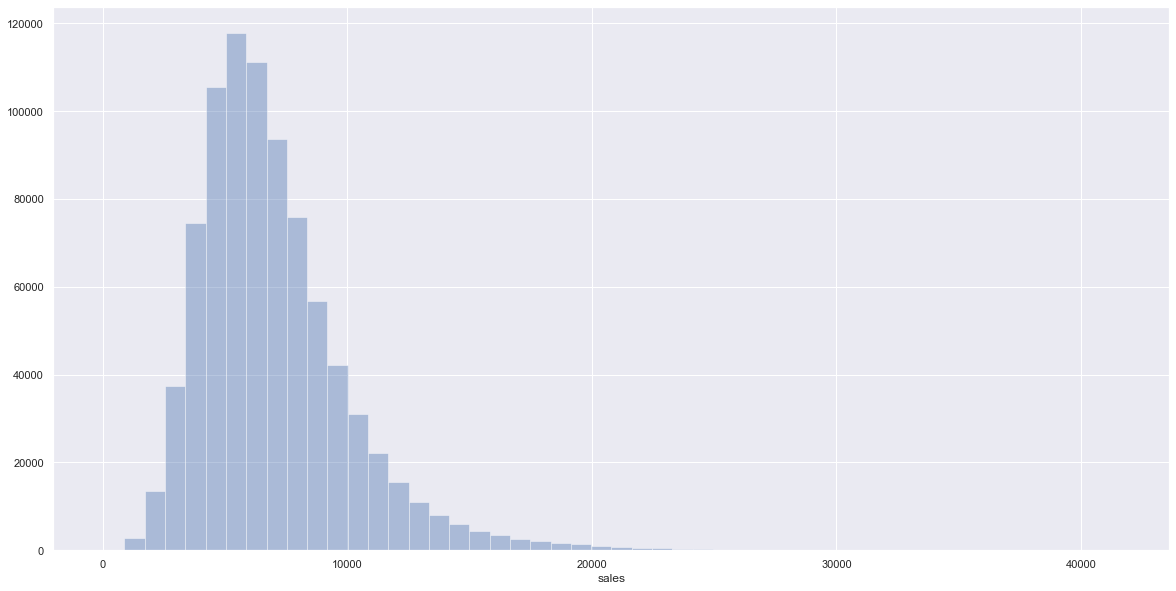

In [43]:
sns.distplot( df4['sales'], kde = False )

### 4.1.2. Numerical Variables

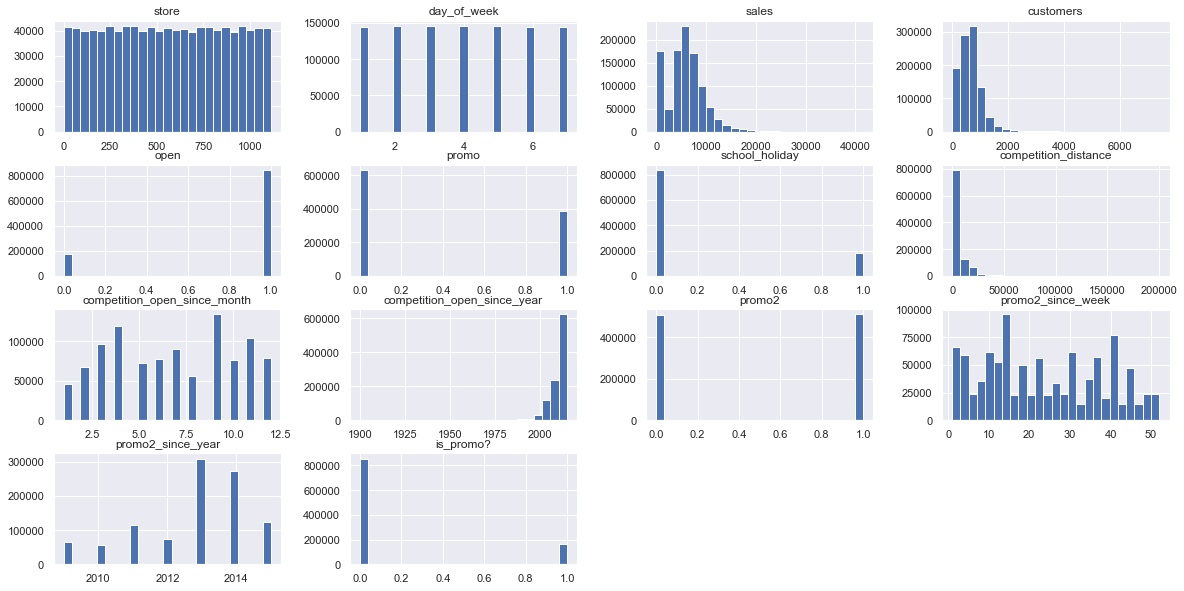

In [44]:
num_attributes.hist(bins = 25);

CONTINUAR!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!11

**##Análise dos Dados##**

Para os histogramas, são apresentados valores visuais referentes aos atributos numéricos que passaram por métricas de estudo (min, max, range, distribuicao, desvio-padrão, skewness - assimetria - e kurtosis ).

**1.** Variável 'store'

**2.** Variável 'day_of_week' = não existem grandes variacoes entre os dias da semana, e que portanto não fornecem grandes informacoes que possam ser trabalhadas. É uma variável que poderia ser analisada apenas durante a análise bivariada ou multi.

**3.** Variável 'sales'

**4.** Variável 'customers'

**5.** Variável 'sales'

**6.** Variável 'promo'

**7.** Variável 'school_holiday'

**8.** Variável 'competition_distance'

**9.** Variável 'competition_open_since_month'

**10** Variável 'competition_open_since_year'

**11.** Variável 'promo2'

**12.** Variável 'promo2_since_week'

**13.** Variável 'promo2_since_year' = essa variável indica o número de vendas em funcao do ano que determinada loja iniciou a promocao 2. Um pico no ano de 2013 claramente é visível, o que pode indicar algum fenômeno não necessariamente correlacionado com a promo2, pois ao longo dos anos as vendas diminuem, quando analisadas as vendas em funcao da promo2.

**14.** Variável 'is_promo?' = existem muito mais vendas quando não há promocao do que quando há promocao (Existem menos vendas quando há promocao, o que pode gerar um insight e que deve ser analisado mais a fundo. 

### 4.1.3. Categorical Variables

In [45]:
# A reminder: 'Categorical Variables', ou variáveis categóricas, são somente as variáveis do tipo objeto (string).

In [46]:
cat_attributes.head()

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul


In [47]:
df4['state_holiday'].drop_duplicates()  #Neste caso, serão retornados apenas os tipos de variáveis categóricas originais.

0            regular_day
63559     public holiday
129424    Easter holiday
241126        Christimas
Name: state_holiday, dtype: object

In [48]:
df4['store_type'].drop_duplicates()

0     c
1     a
12    d
84    b
Name: store_type, dtype: object

In [49]:
df4['assortment'].drop_duplicates()

0         basic
3      extended
258       extra
Name: assortment, dtype: object

/home/renanpacheco/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/renanpacheco/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/renanpacheco/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

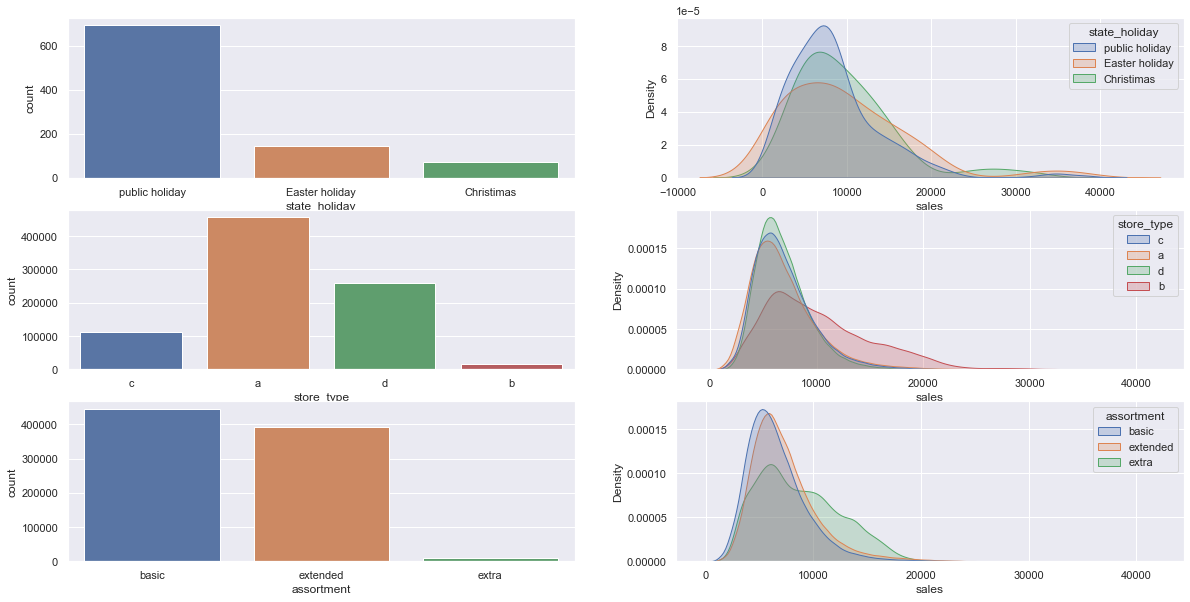

In [50]:
# state_holiday

# É preciso saber o volume de vendas para cada um dos 'state holidays' (Regular day, public holiday, easter holiday e
# Christimas), a fim de entender qual o tipo de feriado que mais impacta as vendas.


# Plotando o histograma da quantidade de vendas em funcao de cada tipo de feriado:
plt.subplot( 3, 2, 1 )
a = df4[ df4['state_holiday'] != 'regular_day' ]  #Neste caso, uma vez que 'regular_day está contido em 'state_holiday',
sns.countplot( a['state_holiday'] );              #ele não é considerado, somente os feriados.


# Plotando o gráfico das vendas em funcao da distribuicao de cada tipo de feriado. É mostrado a densidade de distribuicao,
# e o parâmetro 'hue' mapeia a densidade da influência de cada feriado nas vendas, distribuídas no eixo 'x':
plt.subplot( 3, 2, 2 )
sns.kdeplot( data = a, x = 'sales', hue = 'state_holiday', fill = True, common_norm = False );


# store_type

plt.subplot( 3, 2, 3 )
sns.countplot( df4['store_type'] );

plt.subplot( 3, 2, 4 )
sns.kdeplot( data = df4, x = 'sales', hue = 'store_type', fill = True, common_norm = False );

# assortment:

plt.subplot( 3, 2, 5 )
sns.countplot( df4['assortment'] );    

plt.subplot( 3, 2, 6 )
sns.kdeplot( data = df4, x = 'sales', hue = 'assortment', fill = True, common_norm = False );


## 4.2. Análise Bivariada

### 4.2.1. H1 - Lojas com maior sortimento deveriam vender mais.

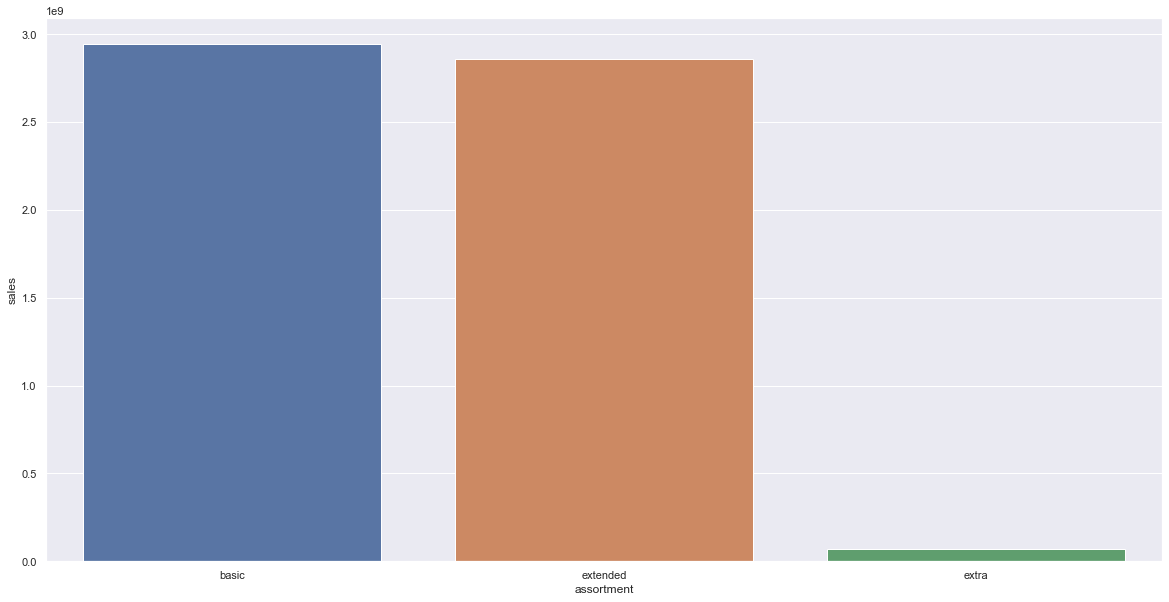

In [51]:
aux1 = df4[['assortment', 'sales']].groupby('assortment').sum().reset_index()

sns.barplot( x = 'assortment', y = 'sales', data = aux1 );

Avaliando o gráfico acima, é possível perceber que lojas com um assortment maior (i.g. lojas do tipo 'extra') possuem um volume de vendas menor em comparacão as lojas com um volume de assortment menor. No entanto, os dados não informam a diferenca entre os assortments do tipo 'extended assortment' e 'extra' e, portanto, não é possível assumir que as lojas do tipo 'extended assortment' possuem um volume de assortment maior em comparacão às lojas do tipo 'extra'.

Entretanto, é interessante validar a hipótese de que assortments do tipo 'extra' possuiam um grande volume de vendas no passado mas que, em funcão de alguma influência externa (Ou de algum atributo não analisado), houve essa reducão drástica..

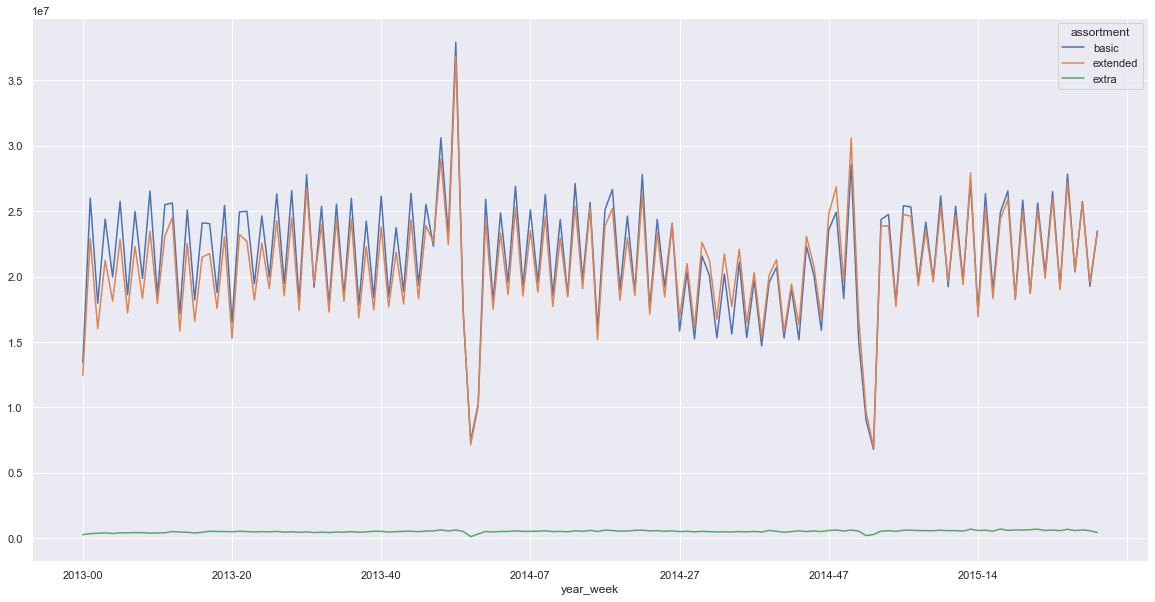

In [52]:
aux2 = df4[['year_week', 'assortment', 'sales']].groupby(['year_week', 'assortment']).sum().reset_index()

aux2.pivot( index = 'year_week',  columns = 'assortment', values = 'sales' ).plot();

Pode-se observar que o volume de vendas dos assortments do tipo 'basic' e 'extended' possuem comportamentos muito semelhantes ou praticamente iguais, em detrimento do assortment do tipo 'extra', que possui um volume de vendas extremamente baixo e comportamento linear.

Porém, pode ser interessante verificar se tal comportamente é realmente linear ou se existe alguma variacão que pode ser influenciada por outras variáveis...

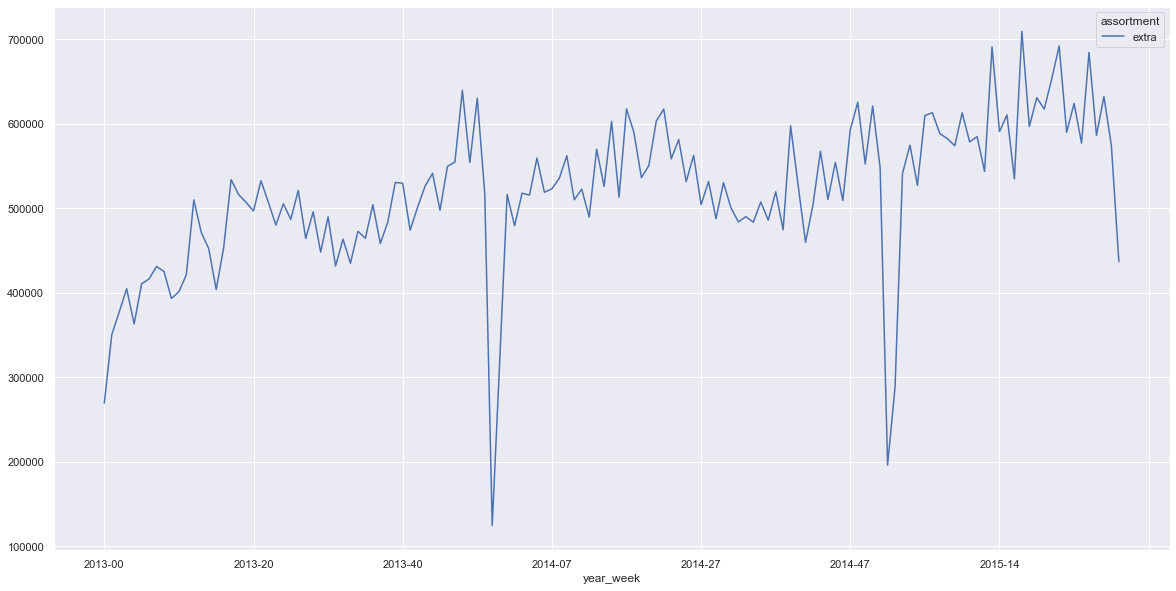

In [53]:
aux3 = aux2[ aux2['assortment'] == 'extra' ]

aux3.pivot( index = 'year_week', columns = 'assortment', values = 'sales' ).plot();

**Conclusão**

A hipótese de que lojas com maior sortimento ('assortment') não é válida, uma vez que, segundo os gráficos, pode-se perceber que lojas com maior sortimento na verdade vendem menos.
Além disso, é notório que a variável 'assortment' é relevante para o modelo, uma vez que influencia diretamente a variável 'sales', além do fato da sazonalidade inferir diretamente no sortimento do tipo 'extra', conforme pode-se perceber pelo gráfico acima.

Hipótese "lojas com maior sortimento deveriam vender mais" -> **FALSA**

Conclusão: Lojas com maior sortimento vendem menos, comparativamente.

### 4.2.2. H2 - Lojas com competidores mais próximos deveriam vender menos.

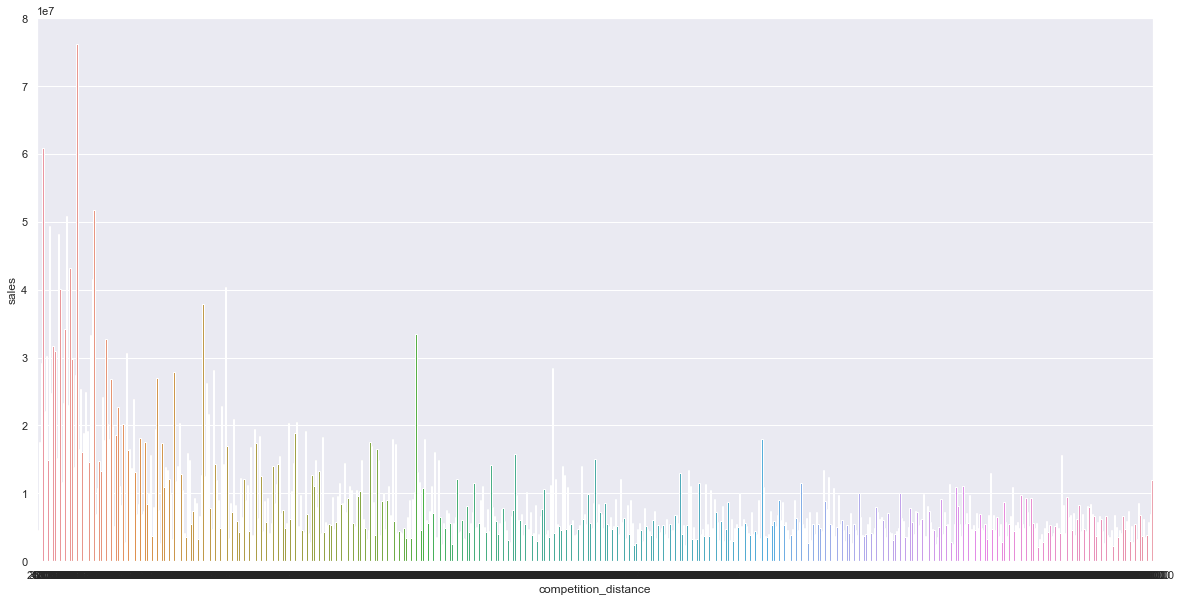

In [54]:
aux1 = df4[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()

sns.barplot( x = 'competition_distance', y = 'sales', data = aux1  );

Entretanto, o gráfico acima é extremamente granular e de difícil visualizacão, uma vez que nenhum dado pode ser obtido.

Ao agrupar um determinado grupo de valores que fazem parte da variável 'competition_distance' em diferentes grupos e, portanto, agregando um número grande de valores, facilita a visualizacão...

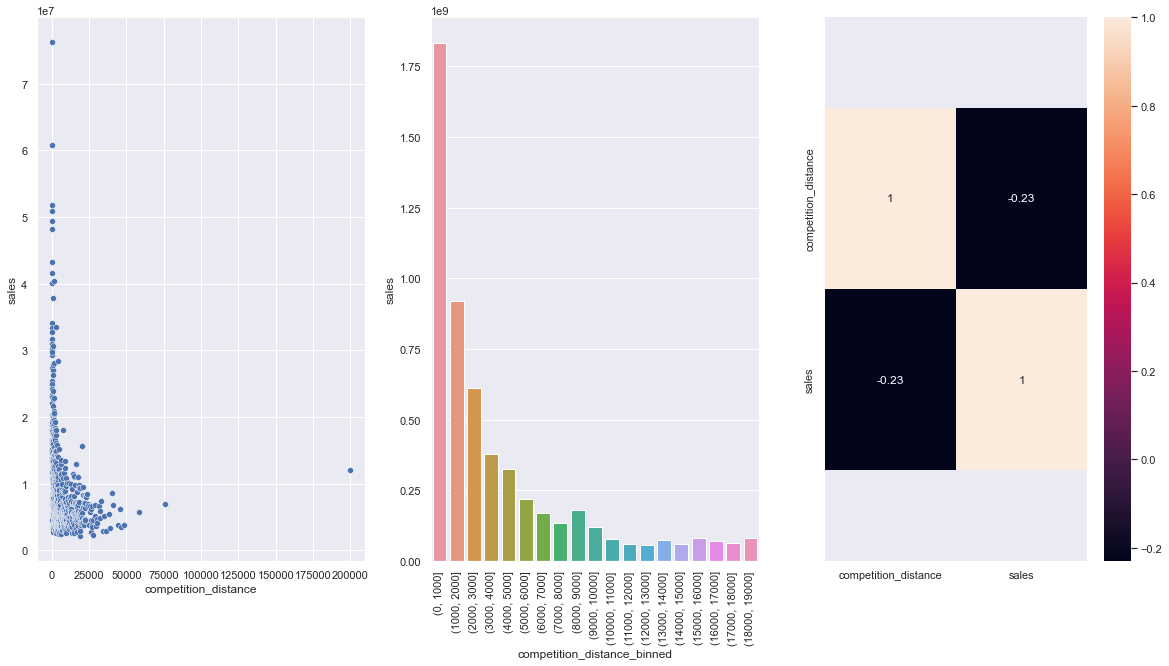

In [55]:
aux1 = df4[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()


plt.subplot( 1, 3, 1 )
sns.scatterplot( x= 'competition_distance', y = 'sales', data = aux1 );


plt.subplot( 1, 3, 2 )
bins = list( np.arange(0, 20000, 1000) )
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins = bins ) 
aux2 = aux1[['competition_distance_binned', 'sales']].groupby('competition_distance_binned').sum().reset_index()

sns.barplot( x= 'competition_distance_binned', y = 'sales', data = aux2 );
plt.xticks( rotation = 90 );


plt.subplot( 1, 3, 3 )
x = sns.heatmap( aux1.corr( method = 'pearson'), annot = True );
bottom, top = x.get_ylim()

x.set_ylim( bottom + 0.5, top - 0.5 );

**1o e 2o gráficos:**
A hipótese diz que "lojas com competidores mais próximos deveriam vender menos". Isso porque a presenca de competicão faz com que hajam mais opcões de compra para os compradores e, portanto, existe um compartilhamento das vendas maior. Portanto, quanto mais próximos estão os competidores, maior a concorrência e, consequentemente, menor as vendas.

Entretanto, à partir da análise dos gráficos apresentados acima, pode-se perceber que, com competidores mais próximos (distâncias menores do que 1000m - 1a tabela do histograma), as lojas apresentam um maior número de vendas. Isso vai de oposto para com a hipótese.

**3o gráfico:**

Conforme mostra no 3o gráfico, a correlacão entre as variáveis 'competition_distance' e 'sales' é de -0.23, o que apresenta um bom valor, uma vez que quanto mais próximo de +1 e/ou -1, melhor a correlacão. 

O valor de -0.23 significa que, quanto mais distante o concorrente se encontra com relacão às lojas Rossmann, menor a venda daquela loja, ou seja, uma correlacão inversamente proporcional. 

**Conclusão**

Hipótese "lojas com competidores mais próximos deveriam vender menos" -> **FALSA**

Conclusão: Lojas com competidores mais próximos vendem mais.

### 4.2.3. H3 - Lojas com competidores a mais tempo deveriam vender mais (Em comparacão as lojas com competidores a menos tempo).

O interessante desta hipótese é a análise do tempo desde que a competicão se iniciou (Quando o competidor mais próximo abriu a loja) e como isso influencia nas vendas.

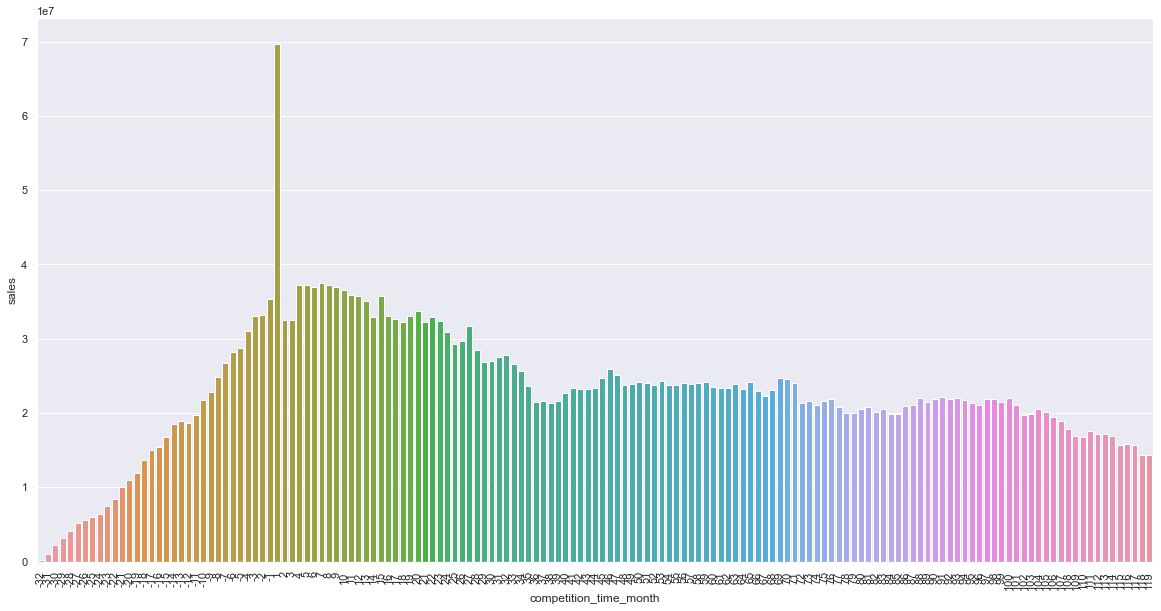

In [56]:
aux1 = df4[['competition_time_month', 'sales']].groupby('competition_time_month').sum().reset_index()

aux2 = aux1[( aux1['competition_time_month'] < 120 ) & ( aux1['competition_time_month'] != 0 )]

sns.barplot( x = 'competition_time_month', y = 'sales', data = aux2 );
plt.xticks( rotation = 90 );

A variável 'competition_time_month' foi derivada a partir da diferenca entre a variável relativa à data da venda atual ('date') e a data que o competidor mais próximo abriu ('competition_open_since_month', no caso). Isso quer dizer que se a venda aconteceu em uma data mais atual com relacão à abertura do competidor, o valor da variável 'competition_time_month' terá valores positivos. Entretanto, caso o competidor ainda não tenha aberto a sua loja, o valor da variável será negativo.

Conforme apresenta o histograma acima, pode-se perceber que valores próximos de zero possuem um volume de vendas maior. Isso significa que quanto mais recente é a abertura da competicão, maior é a quantidade de vendas.

É interessante buscar entender, ainda, a forca da correlacão entre a variável do volume de vendas ('sales') e o mês que o competidor mais próximo abriu alguma loja...

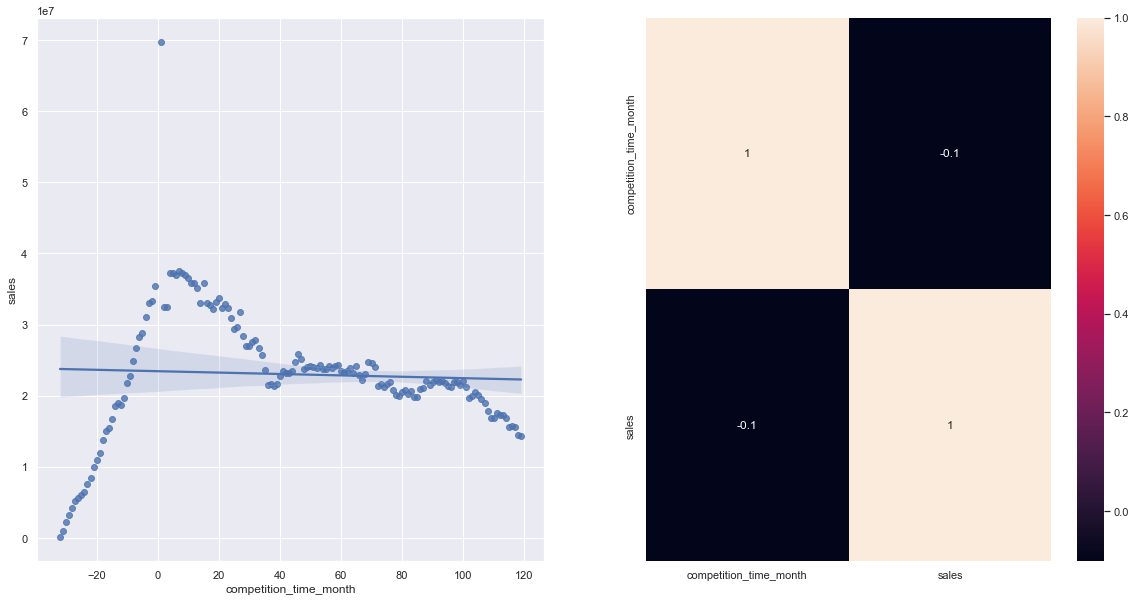

In [57]:
plt.subplot( 1, 2, 1 )
sns.regplot( x = 'competition_time_month', y = 'sales', data = aux2 )

plt.subplot( 1, 2, 2 )
sns.heatmap( aux1.corr( method = 'pearson' ), annot = True );
bottom, top = x.get_ylim()
x.set_ylim( bottom + 0.5, top - 0.5 );  #método usado para bugs da versão do seaborn quando os números das correlacões
                                        #são possicionados muitos ao extremo do gráfico.

**Gráfico a esquerda**
O gráfico de correlacão acima mostra o mesmo comportamento mostrado pelo histograma com uma granulacão um pouco maior, porém com uma linha de tendência caindo, o que indidica a correlacão de que quanto maior o tempo de competicão, menor o volume de venda. Entretanto, não é possível basear a análise somente nessa linha de tendência linear, uma vez que o comportamento não é linear. Isso pode enviesar a análise ao erro. 

**Gráfico a direita**
A partir do gráfico, a correlacão entre a variável 'competition_time_month' em relacão a variável resposta que, no caso, é a variável 'sales', é de -0.1, valor este suficiente para a análise: Correlacões próximas de 0 possuem menos relevância e, apesar de estar longe de +1 e -1, pode ser utilizada.

**Conclusão**

Hipótese "lojas com competidores a mais tempo deveriam vender mais" -> **FALSA**

Conclusão: Lojas com competidores a mais tempo vendem menos, comparativamente.
           Lojas com competidores a menos tempo vendem mais.

 ### 4.2.4. H4 - Lojas com promocoes ativas por mais tempo deveriam vender mais.

In [58]:
df4.head()

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo?,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.00,9,2008,0,31,2015,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.00,11,2007,1,13,2010,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.00,12,2006,1,14,2011,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,regular_day,1,c,extended,620.00,9,2009,0,31,2015,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,29910.00,4,2015,0,31,2015,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


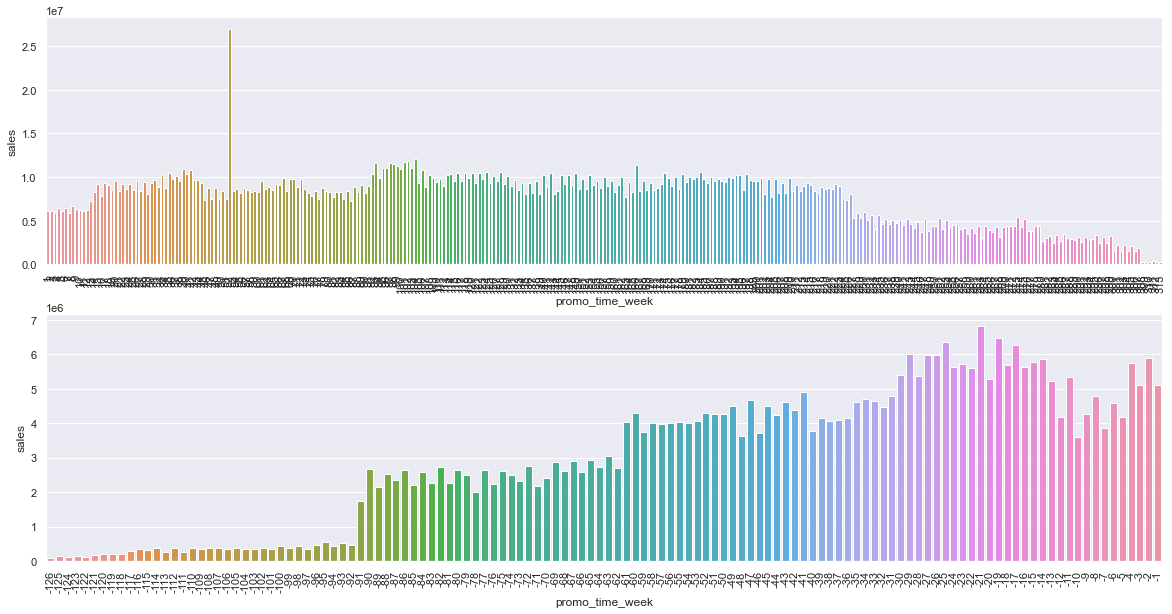

In [59]:
aux1 = df4[['promo_time_week', 'sales']].groupby('promo_time_week').sum().reset_index()

plt.subplot( 2, 1, 1 )
aux2 = aux1[aux1['promo_time_week'] > 0]  #período de promocão extendido
sns.barplot( x = 'promo_time_week', y = 'sales', data = aux2 );
plt.xticks( rotation = 90 );

plt.subplot( 2, 1, 2 )
aux3 = aux1[ aux1['promo_time_week'] < 0 ]  #período de promocão regular
sns.barplot( x = 'promo_time_week', y = 'sales', data = aux3 );
plt.xticks( rotation = 90 );

***Gráfico superior***

O gráfico superior apresenta a variável 'promo_time_week' (Diferenca entre a data atual e a data de início da promocão) com valores positivos, representando a promocão extendida, i.e. a promocão iniciou antes da data de hoje e continua.

Percebe-se, pelo gráfico, que um grande volume de vendas se mantém constante até um certo período de tempo até que comeca a decair, isto é, ela possui um tempo determinado que ela irá funcionar. Após esse tempo, o volume de vendas naturalmente decai.


***Gráfico inferior***

Percebe-se que, em períodos próximos do início da promocão (diferenca entre o período de venda e o período de início da promocão apresenta valor negativo), existem saltos nas vendas, o que pode ser resultado das acões do marketing. Porém, períodos de início da venda muito aquém do início da promocão praticamente não possuem venda alguma, uma vez que atingem o consumidor de forma direta.

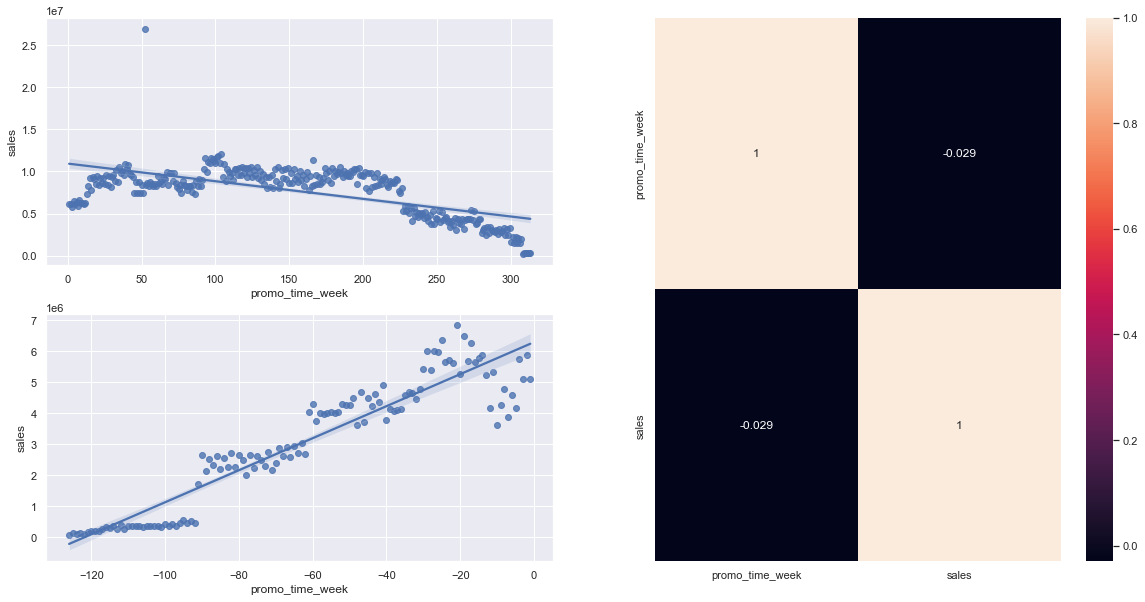

In [66]:
grid = GridSpec( 2, 2 )

plt.subplot( grid[0, 0] )
sns.regplot( x = 'promo_time_week', y = 'sales', data = aux2 );

plt.subplot( grid[1,0] )
sns.regplot( x = 'promo_time_week', y = 'sales', data = aux3 );

plt.subplot( grid[:,1] )
sns.heatmap( aux1.corr( method = 'pearson' ), annot = True );

#aux1 = refere-se ao período de promocao extendida, i.e. a diferenca entre a data da venda (hoje) e o início da promocão 2 
#(variável 'promo_since', que deriva da variável 'promo2_since_year').

#aux2 = 

#aux3 = 

**Gráfico superior aesquerdo:**
O primeiro gráfico à esquerda representa o conjunto de dados 'aux2', o que engloba períodos de extensão da promo2 positivos, i.e. a venda ocorre após o início da promocão. Isso mostra que o crescimento no volume de vendas ocorre de forma indiretamente proporcional à quantidade de semanas que se passaram. Ou seja: Quanto mais próximo do início da promocão, maior o volume de vendas e, quanto mais tempo se passa desde o início da promocão, menos vendas são feitas. Isso por si já desvalida a hipótese.   


**Gráfico inferior à esquerdo:**
Já o gráfico inferior esquerdo mostra, a partir do conjunto de dados 'aux3', períodos de início da promocão negativos, i.e. as vendas são registradas antes do início da promocão. Isso mostra que, caso seja feito o marketing de uma promocão que será ativada muito à frente do futuro, isso não influencia na venda atual.    


**Gráfico de correlacão (Heatmap) à direita:**
A correlacão apresentada pelo gráfico sobre a variável 'promo_time_week' em funcão da variável-resposta 'sales' apresenta uma correlacão de -0.03, o que representa uma correlacão extremamente fraca. Uma vez que o gráfico é a representacão visual do dataframe 'aux1', o qual simboliza o período entre a data da venda (atual) e a data de início da promo2, o valor negativo indica uma fraca correlacão negativa, i.e. além da correlacão entre ambas as variáveis serem baixas, também é inversamente proporcional.

Tal correlacão ser fraca pode ser justificado pelo fato de haver um grande período com volume de vendas constante. Tal diminuicão no número de vendas não está relacionado com o fato do início da promocão estar próxima ou distante e, portanto, outra variável pode influenciar no modelo.

**Conclusão**

Hipótese "lojas com promocões ativas por mais tempo deveriam vender mais" -> **FALSA**

Conclusão: Lojas com promocões ativas por mais tempo vendem menos, comparativamente. Essas lojas com promocões ativas vendem até um certo período e, após isso, o volume de vendas tende a decair.

**Conclusão da correlacão:** A feature de correlacão entre o período que a promo2 está ativa ('promo_time_week') não é tão relevante para o modelo. Espera-se analisar de essa feature pode ou não combinar com outra feature e, assim, ter relevância.

### <s> 4.2.5. H5 - Lojas com mais dias de promocao deveriam vender mais. </s>

**=======> ESSA HIPÓTESE SERÁ ANALISADA DURANTE O 2o CICLO DO CRISP!!! <=======**

### 4.2.6. H6 - Lojas com mais promocoes consecutivas (Em dias consecutivos) deveriam vender mais.

Essa hipótese irá avaliar se lojas que entram no período consecutivo de promocão (da promocão tradicional à promocão de número 2 - 'promo2') vendem mais ou não...

In [68]:
df4[['promo', 'promo2', 'sales']].groupby( ['promo', 'promo2'] ).sum().reset_index()

#variável 'promo' = indica se a loja está no período tradicional de promocão

,promo,promo2,sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


A partir da tabela, pode-se concluir que lojas que não participaram da promo2, ou ainda que não participaram de nenhuma das promocões venderam mais em comparacão com as lojas que participaram das 2 promocões, ou ainda que participaram somente da promo2.

Porém, é interessante buscar entender se esse comportamento mudou ao longo do tempo, ou seja, se as lojas que participaram somente da promocão no período tradicional tiveram alguma mudanca de comportamento quando entraram no período de promocão extendida (promo2), ou se as duas variáveis não possuem nenhuma correlacão entre si...

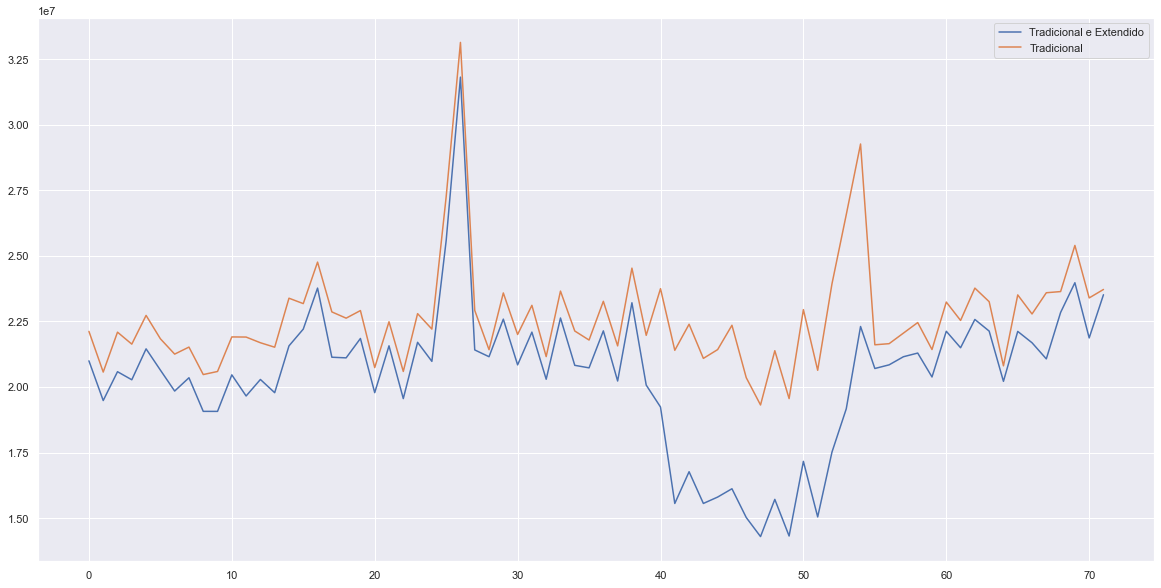

In [78]:
aux1 = df4[ (df4['promo'] == 1) & (df4['promo2'] == 1) ][['year_week',
                                                          'sales']].groupby('year_week').sum().reset_index()

ax = aux1.plot();

aux2 = df4[ (df4['promo'] == 1) & (df4['promo2'] == 0) ][['year_week',
                                                          'sales']].groupby('year_week').sum().reset_index()
aux2.plot( ax = ax );

ax.legend( labels = ['Tradicional e Extendido', 'Tradicional'] );

O gráfico acima mostra as lojas que participaram de ambos os períodos de promocão (Em azul) e somente do período tradicional. Percebe-se que o comportamento do volume de vendas das lojas que participaram de ambas as promocões e somente da promocão tradicional é praticamente o mesmo, salvo por um curto período que influencia o volume de vendas das lojas que participaram de ambas as promocões.

Conclui-se, portanto, que a hipótese de que as lojas que tem promocões ativas por mais tempo (Período tradicional + período extendido) deveriam vender mais é **falsa**, uma vez que mesmo que o comportamento siga o mesmo padrão, em termos de número de vendas acaba sendo menor.

Em termos de relevância como feature para o modelo, não deve ser tão interessante de ser utilizado como feature. 

**Conclusão**

Hipótese "lojas com promocões ativas por mais tempo deveriam vender mais" -> **FALSA**

Conclusão: Lojas com promocões ativas por mais tempo, i.e. com promocões consecutivas, vendem menos, comparativamente.

## 4.3. Análise Multivariada